In [5]:
import numpy as np
import matplotlib.pyplot as plt

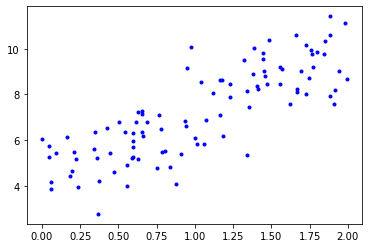

In [6]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.plot(X, y, "b.")

In [7]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [8]:
theta_best

array([[4.34630299],
       [2.79365934]])

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.34630299],
       [9.93362167]])

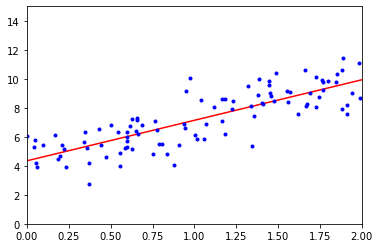

In [10]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression using scikit-learn

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.34630299]), array([[2.79365934]]))

In [12]:
lin_reg.predict(X_new)

array([[4.34630299],
       [9.93362167]])

In [13]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.34630299],
       [2.79365934]])

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.34630299],
       [2.79365934]])

### Gradient Descent

#### Batch Gradient Descent

In [15]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

theta

array([[4.34630299],
       [2.79365934]])

##### Stochastic Gradient descent

In [16]:
n_epochs = 50
t0, t1 = 5, 10

In [17]:
def learning_schedule(t):
    return t0/(t + t1)

theta = np.random.randn(2, 1)


In [18]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1] 
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [19]:
theta

array([[4.34209675],
       [2.72785278]])

In [25]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [26]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.29599611]), array([2.81462206]))

#### Mini-batch Gradient Descent